In [3]:
import tensorflow as tf

## Loading MNIST Data set

In [6]:
mnist = tf.keras.datasets.mnist

## Divide into train and test datasets

In [8]:
(x_train, y_train),(x_test, y_test)=mnist.load_data()

In [11]:
x_train.shape

(60000, 28, 28)

In [14]:
import matplotlib.pyplot as plt

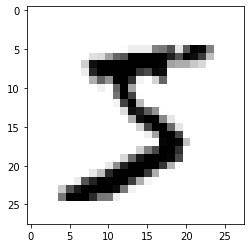

In [17]:
plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()

Before normalization. 1 channel --> 0~255, no colored RGB

In [20]:
# print(x_train[0])

## Normalizing the data | preprocessing

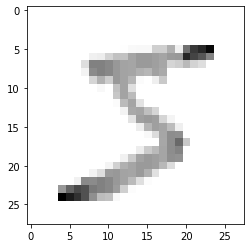

In [22]:
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test, axis=1)
plt.imshow(x_train[0], cmap=plt.cm.binary)

## After normalization

In [24]:
# print(x_train[0]) # value 0~1

In [26]:
print(y_train[0]) # check the label

5


## Resizing image to make it suitable for Conv layer

In [28]:
import numpy as np

In [33]:
#when length equals to width
IMG_SIZE=x_train.shape[1]
x_trainr=np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE,1)
x_testr=np.array(x_test).reshape(-1,IMG_SIZE,IMG_SIZE,1)
print("Training Samples dimension", x_trainr.shape)
print("Testing Samples dimension", x_testr.shape)

Training Samples dimension (60000, 28, 28, 1)
Testing Samples dimension (10000, 28, 28, 1)


## Creating a deep neural network

#### Training 

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [40]:
## Create a neural network now
model = Sequential()

### First convolution layer (number_of_photo,n,n,1), say n=28. 28-3+1=26, 26*26
model.add(Conv2D(64, (3,3), input_shape = x_trainr.shape[1:])) # only for 1st conv layer to mention input layer size
model.add(Activation("relu")) # activation function to make it non-linear: 1) <0, drop; >0, accept.
model.add(MaxPooling2D(pool_size=(2,2))) #Maxpooling single maximum value of 2x2

### 2nd conv layer    26-->13
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

### 3rd Conv layer    
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
 
### Fully connected layer 
model.add(Flatten())  # 2D --> 1D
model.add(Dense(64)) # fully connected neural network
model.add(Activation("relu"))

### Fully connected layer layer #2
model.add(Dense(32))
model.add(Activation("relu"))

### Last fully connected layer, output must be equal number of the class 0~9
model.add(Dense(10)) ## last dense layer must be equal to the output class
model.add(Activation('softmax')) ## class possibilities
##binary classification, one neuron in dense layer, and sigmoid as activation function


In [42]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
activation_9 (Activation)    (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
activation_10 (Activation)   (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 3, 3, 64)         

In [45]:
print("Total Training Samples = ", len(x_trainr))

Total Training Samples =  60000


In [47]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy']) #adam is the best

In [48]:
model.fit(x_trainr, y_train,epochs=5, validation_split=0.3) ##training model

Epoch 1/5
1313/1313 [==============================] - 42s 31ms/step - loss: 0.3513 - accuracy: 0.8881 - val_loss: 0.1478 - val_accuracy: 0.9552
Epoch 2/5
1313/1313 [==============================] - 42s 32ms/step - loss: 0.1085 - accuracy: 0.9662 - val_loss: 0.0985 - val_accuracy: 0.9689
Epoch 3/5
1313/1313 [==============================] - 40s 31ms/step - loss: 0.0796 - accuracy: 0.9755 - val_loss: 0.0869 - val_accuracy: 0.9742
Epoch 4/5
1313/1313 [==============================] - 40s 31ms/step - loss: 0.0610 - accuracy: 0.9812 - val_loss: 0.0787 - val_accuracy: 0.9763
Epoch 5/5
1313/1313 [==============================] - 43s 33ms/step - loss: 0.0521 - accuracy: 0.9841 - val_loss: 0.0786 - val_accuracy: 0.9773


In [51]:
test_loss,test_acc = model.evaluate(x_testr, y_test)
print("Tess loss on 10,000 test samples", test_loss)
print("Validation accuracy on 10,000 test samples", test_acc)

313/313 [==============================] - 3s 9ms/step - loss: 0.0807 - accuracy: 0.9774
Tess loss on 10,000 test samples 0.08066658675670624
Validation accuracy on 10,000 test samples 0.977400004863739


In [52]:
predictions=model.predict([x_testr])


In [54]:
print(predictions)

[[2.3247955e-07 8.9386469e-07 2.5656740e-05 ... 9.9993241e-01
  6.4797746e-08 7.9013910e-07]
 [4.0080829e-07 5.7971255e-07 9.9999666e-01 ... 1.3199053e-07
  5.5634541e-08 4.6806019e-08]
 [1.0990802e-09 9.9999952e-01 1.6852191e-08 ... 1.5804568e-07
  2.0867699e-07 1.8780304e-08]
 ...
 [2.2601270e-09 1.0101154e-06 1.9982419e-08 ... 1.5868530e-07
  5.9969934e-06 4.5149163e-06]
 [1.5648665e-06 1.0473189e-07 1.0314387e-09 ... 1.6932143e-09
  3.2106436e-06 9.4910052e-07]
 [6.2948772e-07 2.6716419e-08 2.0606160e-06 ... 5.1098517e-09
  2.0732641e-07 2.9439076e-07]]


In [56]:
np.argmax(predictions[0])

7

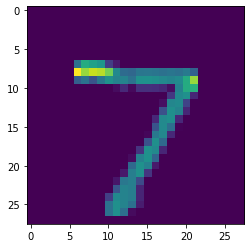

In [57]:
plt.imshow(x_test[0])

## input a pic to test

In [59]:
import cv2

In [61]:
img=cv2.imread('test.jpg')

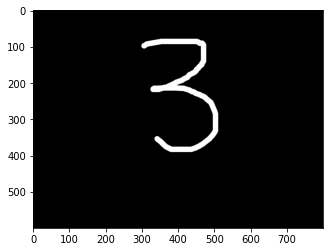

In [63]:
plt.imshow(img)

In [67]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
resized=cv2.resize(gray,(28,28),interpolation=cv2.INTER_AREA)

In [71]:
resized.shape
# plt.imshow(resized)

(28, 28)

In [74]:
newimg=tf.keras.utils.normalize(resized,axis=1) ##normalization

In [76]:
newimg=np.array(newimg).reshape(-1,IMG_SIZE,IMG_SIZE,1)#kernel operation for the conv layer

In [78]:
newimg.shape

(1, 28, 28, 1)

In [79]:
predicions=model.predict(newimg)

In [80]:
np.argmax(predicions)

3